## Airplanes Purchase Risk Assessment


### Project Overview

The objective of this analysis is to evaluate and determine low-risk aircrafts to be purchased by our company, Mawingu Group of Companies as we gear towards expanding our portfolio and breaking into the aviation industry.We aim to opeate airplanes for commercial and private enterprises hence we need to determine the potential risks of aircrafts.
This project analyzes aviation accident data from the National Transport Safety Board, covering civil aviation accidents and selected incidents that occured in the United States and international waters from 1962 to 2023.

### Business Problem
Inorder for Mawingu Group of Companies to expand its portfolio into the aviation industry, we have to understand the risks associated with purchasing and operating airplanes for both commercial and private enterprises. Choosing aricraft models know to be safe is not only important for our customers' safety but also for the business's finances and reputation. 

Assessing historical aviation accident data offers an opportunity to identify key trends, patterns and risk factors linked to different airplane models. This will enable us to make informed decisions backed by the data, as we will have aircraft models with proven track records of safety to choose from.

### Data Understanding

The goal is to explore the National Transportation Safety Board data and identify key features that we can use to assess the risks associated with varies airplanes. These include the severity of the injuries, types of engine, aircraft damage etc.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
df = pd.read_csv("AviationData.csv", encoding='ISO-8859-1', low_memory=False)

state_codes = pd.read_csv("USState_Codes.csv")

In [58]:
state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [60]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [61]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [62]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

After exploring the data, I need to clean the data to make it easier to work with. We can do this by dropping unneccessary columns and normalizing column names


#### Dropping Columns

Some columns have alot of missing values. These columns might not be beneficial to us and the best course of action would be to drop them from our data set.

In [63]:
# Remove the  punctuations on the column names to make them easier to work with

df.columns = df.columns.str.title().str.replace(".","_" )

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50249 non-null  object 
 9   Airport_Name            52790 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_Damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87572 non-null  object 
 14  Make                    88826 non-null

In [65]:
#check the number of null values in each column

df.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_Damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6084
Engine_Type                7077
Far_Description           56866
Schedule                  76307
Purpose_Of_Flight          6192
Air_Carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_Phase_Of_Flight     27165
Report_Status              6381
Publication_Date          13771
dtype: i

In [66]:
# Drop unnecessary columns - from the previous code we can see columns with a lot of null values
#which we might not necessarily need
df.drop(["Latitude", "Longitude", "Airport_Code", "Airport_Name", "Schedule", "Air_Carrier", "Far_Description", "Publication_Date"], axis = 1, inplace = True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury_Severity         87889 non-null  object 
 7   Aircraft_Damage         85695 non-null  object 
 8   Aircraft_Category       32287 non-null  object 
 9   Registration_Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur_Built           88787 non-null  object 
 13  Number_Of_Engines       82805 non-null  float64
 14  Engine_Type             81812 non-null

In [68]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type',
       'Purpose_Of_Flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_Of_Flight', 'Report_Status'],
      dtype='object')

#### Dropping Rows

Inasmuch as we ave dropped columns with null values, some of the rows still have alot of missing values. Other rows have irrelevant information that might not be the most important for us when making our recommendations

In [69]:
# drop null values in rows that I think are important
df.dropna(subset=["Aircraft_Category", "Aircraft_Damage", "Engine_Type", "Model", "Make", "Injury_Severity", "Number_Of_Engines","Total_Fatal_Injuries"], inplace=True)

In [70]:
df.shape

(21953, 23)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21953 entries, 7 to 88767
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                21953 non-null  object 
 1   Investigation_Type      21953 non-null  object 
 2   Accident_Number         21953 non-null  object 
 3   Event_Date              21953 non-null  object 
 4   Location                21953 non-null  object 
 5   Country                 21943 non-null  object 
 6   Injury_Severity         21953 non-null  object 
 7   Aircraft_Damage         21953 non-null  object 
 8   Aircraft_Category       21953 non-null  object 
 9   Registration_Number     21949 non-null  object 
 10  Make                    21953 non-null  object 
 11  Model                   21953 non-null  object 
 12  Amateur_Built           21951 non-null  object 
 13  Number_Of_Engines       21953 non-null  float64
 14  Engine_Type             21953 non-null

#### Checking for invalid characters/values

In [72]:
#convert the event time column to datetime

df["Event_Date"] = pd.to_datetime(df["Event_Date"], errors="coerce")

In [73]:
df.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Injury_Severity                   object
Aircraft_Damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_Of_Engines                float64
Engine_Type                       object
Purpose_Of_Flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Broad_Phase_Of_Flight             object
Report_Status                     object
dtype: object

In [74]:
df["Aircraft_Category"].unique()

array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Weight-Shift', 'Powered Parachute',
       'Rocket', 'Blimp', 'WSFT'], dtype=object)

In [75]:
df["Engine_Type"].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Prop',
       'Turbo Fan', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [76]:
# Checking for duplicates

df.duplicated().sum()


0

#### Dropping data in the Amateur built column

In [77]:
# Drop all "Yes" in the Amateur_built column
df = df[df["Amateur_Built"] == "No"]

In [78]:
df.shape

(19280, 23)

### Data Visualizations

#### Analysis of Accident trends

<BarContainer object of 19280 artists>

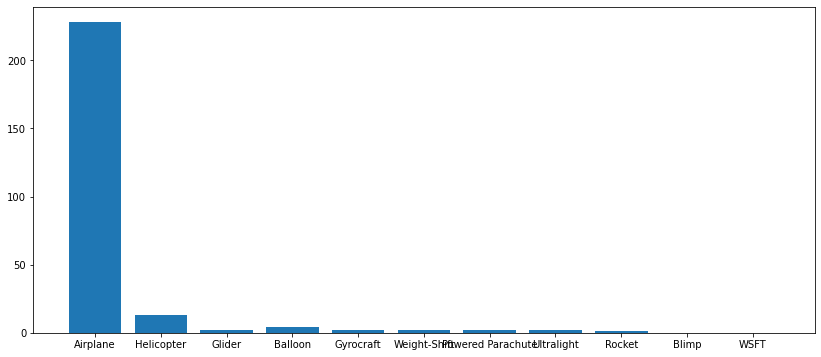

In [79]:
x = df["Aircraft_Category"]
y= df["Total_Fatal_Injuries"]

plt.figure(figsize=(14, 6))
plt.bar(x, y)

In [81]:
df["Make"] = df["Make"].str.title()

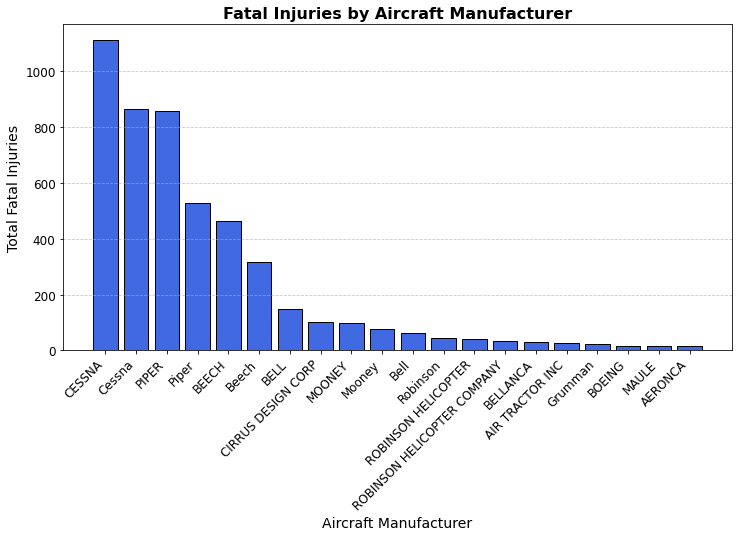

In [80]:
# Get top 10 aircraft manufacturers with the most occurrences
top_makes_list = df["Make"].value_counts().nlargest(20).index  

# Filter dataset to include only these makes
df_top_makes = df[df["Make"].isin(top_makes_list)]

# Aggregate total fatalities for each make
fatalities_by_make = df_top_makes.groupby("Make")["Total_Fatal_Injuries"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(fatalities_by_make.index, fatalities_by_make.values, color="royalblue", edgecolor="black")

# Formatting
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Aircraft Manufacturer", fontsize=14)
plt.ylabel("Total Fatal Injuries", fontsize=14)
plt.title("Fatal Injuries by Aircraft Manufacturer", fontsize=16, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add light horizontal gridlines for better readability

# Show the plot
plt.show()

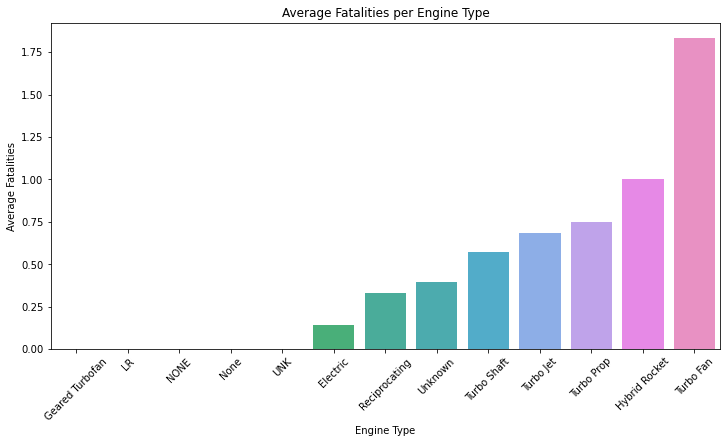

In [33]:
# Group by Engine Type and calculate mean fatalities
engine_fatalities = df.groupby("Engine_Type")["Total_Fatal_Injuries"].mean().sort_values()

# Bar Chart - Average Fatalities per Engine Type
plt.figure(figsize=(12,6))
sns.barplot(x=engine_fatalities.index, y=engine_fatalities.values)
plt.xticks(rotation=45)
plt.title("Average Fatalities per Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Fatalities")
plt.show()



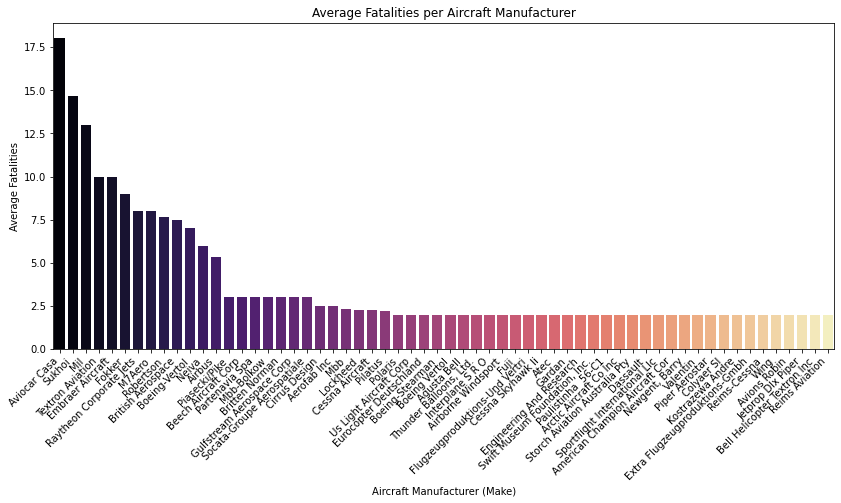

In [34]:
# Group by 'Make' and calculate mean fatalities
make_fatalities = df.groupby("Make")["Total_Fatal_Injuries"].mean().sort_values(ascending=False)

# Select top 15 manufacturers by fatalities
top_makes = make_fatalities.head(60)

# Bar Chart - Average Fatalities per Manufacturer
plt.figure(figsize=(14,6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("Average Fatalities per Aircraft Manufacturer")
plt.xlabel("Aircraft Manufacturer (Make)")
plt.ylabel("Average Fatalities")
plt.show()



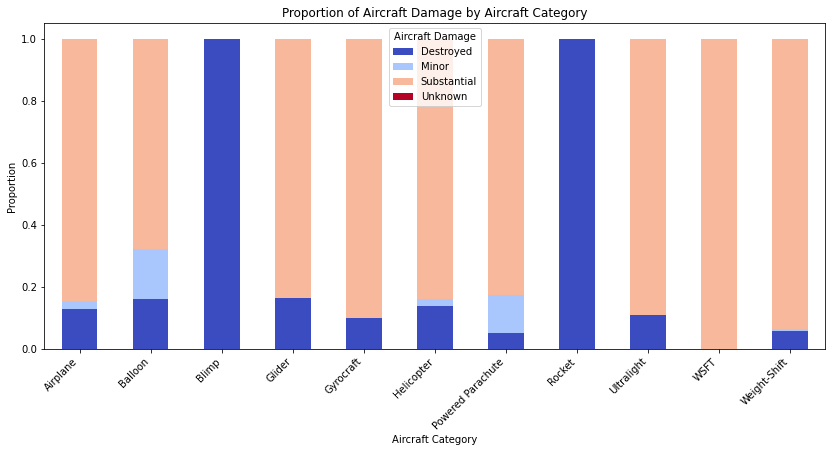

In [39]:
# Group data by Aircraft Category and Aircraft Damage
damage_counts = df.groupby(["Aircraft_Category", "Aircraft_Damage"]).size().unstack()

# Stacked Bar Chart - Proportion of Damage Types per Category
damage_counts.div(damage_counts.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(14,6), colormap="coolwarm")
plt.title("Proportion of Aircraft Damage by Aircraft Category")
plt.xlabel("Aircraft Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Aircraft Damage")
plt.show()


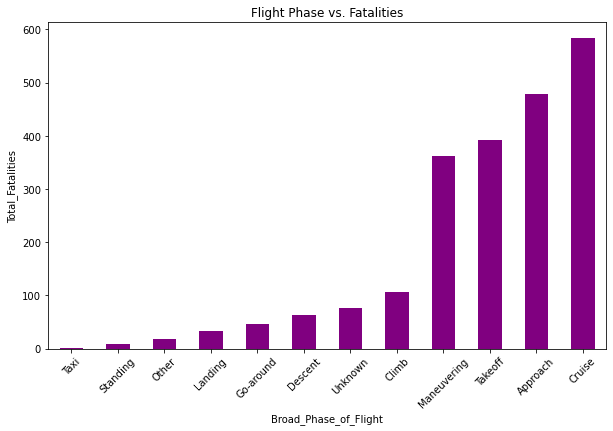

In [47]:
## ------------------------------------------
## 5. Broad Phase of Flight vs. Fatalities
## ------------------------------------------
fatalities_phase = df.groupby("Broad_Phase_Of_Flight")["Total_Fatal_Injuries"].sum()
plt.figure(figsize=(10, 6))
fatalities_phase.sort_values().plot(kind="bar", color="purple")
plt.xlabel("Broad_Phase_of_Flight")
plt.ylabel("Total_Fatalities")
plt.title("Flight Phase vs. Fatalities")
plt.xticks(rotation=45)
plt.show()


#### Correlation matrix

In [35]:
correlation_matrix = df.corr()
correlation_matrix

,Number_Of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Year
Number_Of_Engines,1.000000,0.115220,0.048672,0.039242,0.283653,-0.020462
Total_Fatal_Injuries,0.115220,1.000000,0.079020,0.019369,-0.033188,-0.022344
Total_Serious_Injuries,0.048672,0.079020,1.000000,0.402872,0.066411,0.019362
Total_Minor_Injuries,0.039242,0.019369,0.402872,1.000000,0.044387,-0.059003
Total_Uninjured,0.283653,-0.033188,0.066411,0.044387,1.000000,0.010357
Year,-0.020462,-0.022344,0.019362,-0.059003,0.010357,1.000000


<AxesSubplot:>

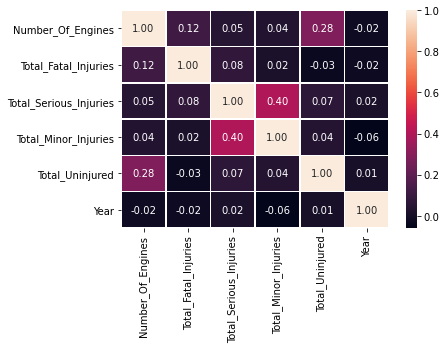

In [36]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)